# **Parte 1:**

## **1) Utilize o dataset de Aerogerador.**

In [120]:
import pandas as pd

In [121]:
dr_aerogerador = pd.read_csv('aerogerador2.csv')
dr_aerogerador.head()

,Wind Speed (m/s),TheoreticalPowerCurve
0,2.9,16.0
1,2.9,16.0
2,2.9,16.0
3,3.0,18.0
4,3.0,18.0


## **2) Estime a curva de potência utilizando regressão linear e regressão polinomial. Calcule métricas adequadas para o problema e justifique suas escolhas.**

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Regressão Linear

In [123]:
X = dr_aerogerador['Wind Speed (m/s)']
y = dr_aerogerador['TheoreticalPowerCurve']
X = np.array(X)
y = np.array(y)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3, random_state= 42)

In [124]:
modelo = LinearRegression()
modelo.fit(Xtrain.reshape(-1,1), ytrain)

LinearRegression()

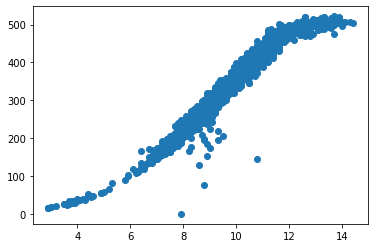

In [125]:
plt.scatter(X,y)
plt.show()

In [126]:
ypred = modelo.predict(Xtest.reshape(-1,1))

In [127]:
ytest = np.array(ytest)
ypred = np.array(ypred)

#### MSE

In [128]:
np.sqrt(mean_squared_error(ytest,ypred))

21.086389888603257

#### MAE

In [129]:
mean_absolute_error(ytest, ypred)

15.110972882715279

### Regressão polinomial

In [130]:
poly_regressor = PolynomialFeatures(degree=2)
X_poly = poly_regressor.fit_transform(X.reshape(-1,1))

In [131]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_poly,y,test_size = 0.3, random_state= 42)

In [132]:
modelo2 = LinearRegression()
modelo2.fit(X_poly, y)

LinearRegression()

In [133]:
ypred2 = modelo2.predict(Xtest)

#### MSE

In [134]:
np.sqrt(mean_squared_error(ytest,ypred2))

21.14674318674777

#### MAE

In [135]:
mean_absolute_error(ytest, ypred2)

15.025318066918404

### **3) Remova os outliers.**

In [136]:
import plotly.express as px

#### Outliers - Wind Speed (m/s)

<AxesSubplot:>

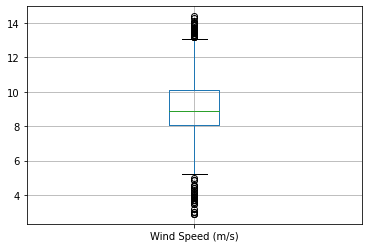

In [137]:
dr_aerogerador.boxplot(column='Wind Speed (m/s)')

#### Outliers - TheoreticalPowerCurve

<AxesSubplot:>

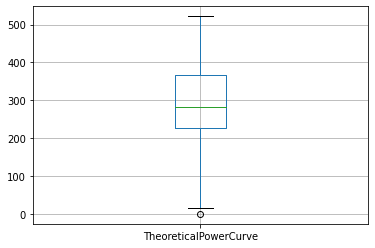

In [138]:
dr_aerogerador.boxplot(column='TheoreticalPowerCurve')

#### Utilizando a biblioteca Pyod como o modelo KNN

In [139]:
from pyod.models.knn import KNN

In [140]:
detector = KNN()
detector.fit(dr_aerogerador)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [141]:
previsoes = detector.labels_
previsoes

array([1, 1, 1, ..., 0, 0, 1])

In [142]:
np.unique(previsoes, return_counts=True)

(array([0, 1]), array([2033,  206]))

In [143]:
confi_previsoes = detector.decision_scores_
confi_previsoes

array([6.00749532, 6.00749532, 6.00749532, ..., 0.2       , 0.4       ,
       1.3453624 ])

In [144]:
outliers = []
for i in range(len(previsoes)):
    if previsoes[i] == 1:
        outliers.append(i)

In [145]:
print(outliers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 69, 71, 72, 73, 74, 75, 76, 77, 80, 81, 84, 87, 89, 93, 94, 97, 164, 176, 204, 317, 431, 652, 944, 1072, 1073, 1096, 1136, 1145, 1197, 1303, 1361, 1372, 1448, 1450, 1454, 1509, 1617, 1631, 1650, 1675, 1697, 1722, 1726, 1742, 1747, 1751, 1762, 1766, 1772, 1778, 1791, 1792, 1795, 1797, 1819, 1824, 1828, 1829, 1840, 1841, 1847, 1856, 1861, 1862, 1869, 1870, 1873, 1882, 1885, 1887, 1891, 1903, 1906, 1919, 1922, 1923, 1924, 1925, 1927, 1928, 1930, 1938, 1939, 1944, 1945, 1947, 1953, 1966, 1967, 1973, 1974, 1977, 1993, 1996, 2001, 2005, 2007, 2008, 2013, 2017, 2028, 2033, 2036, 2042, 2066, 2078, 2085, 2091, 2095, 2119, 2121, 2126, 2133, 2136, 2140, 2144, 2146, 2151, 2158, 2159, 2165, 2173, 2182, 2183, 2184, 2191, 2194, 2196, 2197, 2199, 2204, 2205, 2209, 2211, 2212, 22

In [146]:
lista_outliers = dr_aerogerador.iloc[outliers,:]
lista_outliers

,Wind Speed (m/s),TheoreticalPowerCurve
0,2.9,16.0
1,2.9,16.0
2,2.9,16.0
3,3.0,18.0
4,3.0,18.0
...,...,...
2228,13.9,505.0
2229,13.9,517.0
2230,13.9,520.0
2232,14.0,495.0


In [147]:
df_teste = dr_aerogerador.drop(outliers,axis = 0)


In [148]:
X1 = df_teste['Wind Speed (m/s)']
y1 = df_teste['TheoreticalPowerCurve']

X1 = np.array(X1)
y1 = np.array(y1)

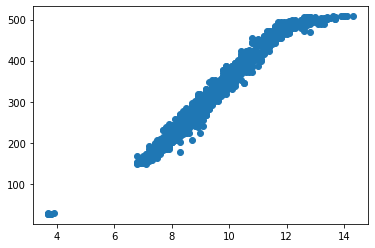

In [149]:
plt.scatter(X1,y1)
plt.show()

#### Utilizando Zscore

In [150]:
outliers_1 = []

def find_outliers(dr_aerogerador):
    corte_dr_aerogerador = 3
    media = dr_aerogerador['Wind Speed (m/s)'].mean() # média
    desvio_padrao = dr_aerogerador['Wind Speed (m/s)'].std() # Desvio padrão

    for dado in dr_aerogerador["Wind Speed (m/s)"]:
        
        z_score = (dado - media) / desvio_padrao
        if np.abs(z_score) > corte_dr_aerogerador:
            outliers_1.append(1)
        else:
            outliers_1.append(0)
    
    return outliers_1

outliers_1 = find_outliers(dr_aerogerador)


In [151]:
outliers2 = []
for i in range(len(outliers_1)):
    if outliers_1[i] == 1:
        outliers2.append(i)

In [152]:
df_teste2 = dr_aerogerador.drop(outliers2,axis = 0)

In [153]:
df_teste2

,Wind Speed (m/s),TheoreticalPowerCurve
27,4.2,40.0
28,4.3,38.0
29,4.4,52.0
30,4.4,46.0
31,4.5,45.0
...,...,...
2232,14.0,495.0
2233,14.0,508.0
2234,14.0,508.0
2235,14.0,508.0


In [154]:
X2 = df_teste2['Wind Speed (m/s)']
y2 = df_teste2['TheoreticalPowerCurve']

X2 = np.array(X2)
y2 = np.array(y2)

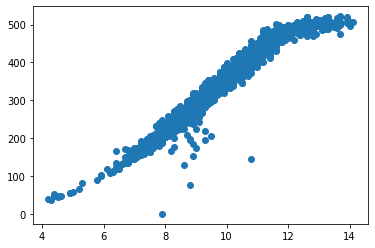

In [155]:
plt.scatter(X2,y2)
plt.show()

#### Utilizando modelo Local Outlier Factor

In [156]:
from sklearn.neighbors import LocalOutlierFactor

In [157]:
clf = LocalOutlierFactor(n_neighbors=3)
pred = clf.fit_predict(dr_aerogerador)

In [158]:
df_teste = {'Wind Speed (m/s)':[], 'TheoreticalPowerCurve':[]}
for i in dr_aerogerador.index:
    if pred[i] == 1:
        df_teste['Wind Speed (m/s)'].append(dr_aerogerador['Wind Speed (m/s)'][i])
        df_teste['TheoreticalPowerCurve'].append(dr_aerogerador['TheoreticalPowerCurve'][i])
df_teste = pd.DataFrame(df_teste)        
        

<AxesSubplot:xlabel='Wind Speed (m/s)', ylabel='TheoreticalPowerCurve'>

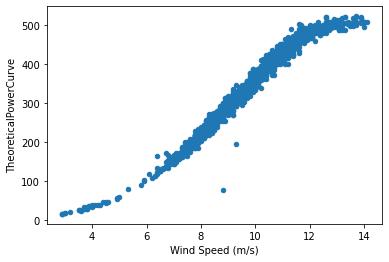

In [159]:
df_teste.plot.scatter('Wind Speed (m/s)','TheoreticalPowerCurve')

## **4) Estime a curva de potência sem os outliers. Calcule as métricas utilizadas na etapa 2.**

### Regressão Linear

In [160]:
X = df_teste['Wind Speed (m/s)']
y = df_teste['TheoreticalPowerCurve']

X = np.array(X)
y = np.array(y)

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3, random_state= 42)

modelo1 = LinearRegression()
modelo1.fit(Xtrain.reshape(-1,1), ytrain)

LinearRegression()

In [161]:
Xtest = np.array(Xtest)
ypred1 = modelo1.predict(Xtest.reshape(-1,1))

#### MSE

In [162]:
np.sqrt(mean_squared_error(ytest,ypred1))

18.902868542031644

#### MAE

In [163]:
mean_absolute_error(ytest, ypred1)

14.456079048252242

### Regressão Polinomial

In [164]:
poly_regressor = PolynomialFeatures(degree=2)
X_poly = poly_regressor.fit_transform(X.reshape(-1,1))

Xtrain, Xtest, ytrain, ytest = train_test_split(X_poly,y,test_size = 0.3, random_state= 42)

modelo2 = LinearRegression()
modelo2.fit(X_poly, y)

LinearRegression()

In [165]:
ypred2 = modelo2.predict(Xtest)

#### MSE

In [166]:
np.sqrt(mean_squared_error(ytest,ypred2))

19.004396607408474

#### MAE

In [167]:
mean_absolute_error(ytest, ypred2)

14.29996860356233

## **5) Realize diferentes experimentos, modificando o grau do polinômio. Escolha uma ou mais métricas e realize o plot grau do polinômio (x) vs métrica (y).**


In [168]:
lis_grau = [2,3,4,5,6,7,8,9,10]
list_MAE = []
list_MSE = []

In [169]:
for i in lis_grau:
    poly_regressor = PolynomialFeatures(degree=i)
    X_poly = poly_regressor.fit_transform(X.reshape(-1,1))

    Xtrain, Xtest, ytrain, ytest = train_test_split(X_poly,y,test_size = 0.3, random_state= 42)

    modelo2 = LinearRegression()
    modelo2.fit(X_poly, y)

    ypred2 = modelo2.predict(Xtest)

    list_MAE.append(mean_absolute_error(ytest, ypred2))

    list_MSE.append(np.sqrt(mean_squared_error(ytest,ypred2)))

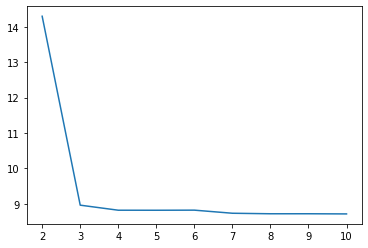

In [170]:
plt.plot(lis_grau,list_MAE)
plt.show()

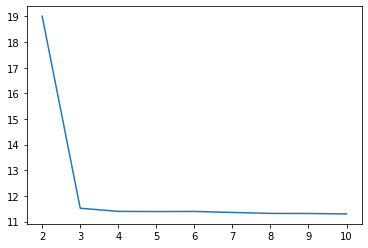

In [171]:
plt.plot(lis_grau,list_MSE)
plt.show()

## **6) Discuta os resultados.**

Como foi visto logo acima gráficos, precisamos ir só até polinômio de grau 3 para chegar em um platô


# **Parte 2:**
 ## **1) Utilize o dataset Boston House Prices.**
  

In [172]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
boston = load_boston()

/home/matheus/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

In [173]:
X.shape

(506, 13)

In [174]:
y.shape

(506,)

In [175]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [176]:
df_boston = pd.DataFrame(X)
df_boston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [177]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [178]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


2) Realize a predição do valor monetário de uma casa localizada na área de Boston utilizando diversas técnicas de regressão (Linear, Random Forest, SVM, entre outros). Calcule métricas adequadas para o problema e justifique suas escolhas.

LINEAR REGRESSION

In [179]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.3, random_state= 42)


clf_RL = LinearRegression()
clf_RL.fit(Xtrain, ytrain)

LinearRegression()

In [180]:
ypred = clf_RL.predict(Xtest)

MSE

In [181]:
np.sqrt(mean_squared_error(ytest,ypred))

4.638689926172788

MAE

In [182]:
mean_absolute_error(ytest, ypred)

3.1627098714573685

Regression Random Forest

In [183]:
from sklearn.ensemble import RandomForestRegressor

In [184]:
clf_RFR = RandomForestRegressor()
clf_RFR.fit(Xtrain, ytrain)

ypred = clf_RFR.predict(Xtest)

MSE


In [185]:
np.sqrt(mean_squared_error(ytest,ypred))

3.051710094356933

MAE

In [186]:
mean_absolute_error(ytest, ypred)

2.088578947368421

Regression SVM

In [187]:
from sklearn.svm import SVR

In [188]:
clf_SVR = SVR()
clf_SVR.fit(Xtrain, ytrain)

ypred = clf_SVR.predict(Xtest)

MSE

In [189]:
np.sqrt(mean_squared_error(ytest,ypred))

7.314622939530491

MAE

In [190]:
mean_absolute_error(ytest, ypred)

4.730064192072545

**3) Realize diferentes experimentos alterando os hiperparâmetros.**

Regression Linear

In [191]:
from sklearn.model_selection import RandomizedSearchCV

In [192]:
clf_RL.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [193]:
param_RL = {
    "copy_X": [True, False],
    "normalize": ['deprecated', False]
}

RL_rand_search = RandomizedSearchCV(clf_RL, param_RL, n_iter= 2,
                                     scoring='accuracy', n_jobs=-1, random_state=13, cv = 2)

In [194]:
RL_rand_search.fit(Xtrain, ytrain)

/home/matheus/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/home/matheus/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/home/matheus/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test p

RandomizedSearchCV(cv=2, estimator=LinearRegression(), n_iter=2, n_jobs=-1,
                   param_distributions={'copy_X': [True, False],
                                        'normalize': ['deprecated', False]},
                   random_state=13, scoring='accuracy')

In [195]:
RL_rand_search.best_params_

{'normalize': False, 'copy_X': True}

In [196]:
clf_RL = LinearRegression(normalize=False, copy_X=True)
clf_RL.fit(Xtrain, ytrain)

ypred = clf_RL.predict(Xtest)

/home/matheus/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


MSE

In [197]:
np.sqrt(mean_squared_error(ytest,ypred))

4.638689926172788

MAE

In [198]:
mean_absolute_error(ytest, ypred)

3.1627098714573685

Regression Random Forest

In [199]:
clf_RFR.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=500, num=50)]

max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=5)]

min_samples_split = [2, 3, 5, 7]

param_RFR ={
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
}

RFR_rand_search = RandomizedSearchCV(clf_RFR, param_RFR, n_iter= 2,
                                     scoring='accuracy', n_jobs=-1, random_state=13, cv = 2)

RFR_rand_search.fit(Xtrain, ytrain)

In [201]:
RFR_rand_search.best_params_

{'n_estimators': 410, 'min_samples_split': 5, 'max_depth': 11}

In [218]:
clf_RFR = RandomForestRegressor(n_estimators = 410, min_samples_split = 5, max_depth = 11) 
clf_RFR.fit(Xtrain, ytrain)

ypred = clf_RFR.predict(Xtest)

MSE

In [203]:
np.sqrt(mean_squared_error(ytest,ypred))

3.1256531682245

MAE

In [204]:
mean_absolute_error(ytest, ypred)

2.110470807785278

Regression SVM

In [205]:
clf_SVR.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [206]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
degree = [2,3,4,5,6,7,8,9,10]
gamma = ['scale', 'auto']

param_SVR ={
    "kernel": kernel,
    "degree": degree,
    "gamma": gamma 
}

SVR_rand_search = RandomizedSearchCV(clf_SVR, param_SVR, n_iter= 2,
                                     scoring='accuracy', n_jobs=-1, random_state=42, cv = 2)

SVR_rand_search.fit(Xtrain, ytrain)

/home/matheus/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/matheus/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/matheus/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/matheus/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/matheus/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/matheus/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", l

RandomizedSearchCV(cv=2, estimator=SVR(), n_iter=2, n_jobs=-1,
                   param_distributions={'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid', 'precomputed']},
                   random_state=42, scoring='accuracy')

In [207]:
SVR_rand_search.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'degree': 6}

In [208]:
clf_SVR = SVR(kernel = 'linear', gamma = 'scale', degree = 6)
clf_SVR.fit(Xtrain, ytrain)

ypred = clf_SVR.predict(Xtest)

MSE

In [209]:
np.sqrt(mean_squared_error(ytest,ypred))

5.062252456898107

MAE

In [210]:
mean_absolute_error(ytest, ypred)

3.186716853299939

## **4) Realize a normalização e padronização dos dados, utilizando o melhor classificador.**


In [211]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

O melhor classificar foi Regression Random Forest pois teve os melhores resultados tanto mean squared error como mean absolute error.

### Normalização

In [222]:
normal = MinMaxScaler(feature_range = (0,1))
rescaledX = normal.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(rescaledX, y,test_size=0.3, random_state = 42)

clf_RFR = RandomForestRegressor(n_estimators = 410, min_samples_split = 5, max_depth = 11) 
clf_RFR.fit(Xtrain, ytrain)

ypred = clf_RFR.predict(Xtest)

MSE

In [223]:
np.sqrt(mean_squared_error(ytest,ypred))

3.093239461425386

MAE

In [224]:
mean_absolute_error(ytest,ypred)

2.0887545477944163

### Padronização

In [225]:
standard = StandardScaler()
standard.fit(X)

X_train, X_test, y_train, y_test = train_test_split(rescaledX, y,test_size=0.3, random_state = 42)

clf_RFR = RandomForestRegressor(n_estimators = 410, min_samples_split = 5, max_depth = 11) 
clf_RFR.fit(Xtrain, ytrain)

ypred = clf_RFR.predict(Xtest)

MSE

In [226]:
np.sqrt(mean_squared_error(ytest,ypred))

3.1368563739068365

MAE

In [227]:
mean_absolute_error(ytest,ypred)

2.1048289823466955

## **5) Discuta os resultados.**

A máquina que obteve às melhores métricas tanto sem a otimização de hiperparâmetros, e utilizando o random search para à otimização dos hiperparâmetros, logo foi observado que para este caso que ao utilizar a normalização dos dados invés da padronização, temos melhores resultados.

E obtivemos uma melhora nas métricas ao utilizar a normalização ao invés da padronização